**Empirical Analysis of Trading Strategies for Vodafone (VOD) Using Time Series Models**

**ADELINE MAKOKHA**

**ADM NO: 191199**



**Abstract**

This study analyzes Vodafone (VOD) stock price movements by implementing multiple trading strategies based on time series models. Using historical data from Yahoo Finance, we evaluate the effectiveness of various technical indicators and forecasting techniques. The strategies explored include Moving Average Convergence Divergence (MACD), Relative Strength Index (RSI), Bollinger Bands, Volume Weighted Average Price (VWAP), and an ARMA model. Through backtesting and performance evaluation, we assess the profitability of each approach. The findings contribute to a deeper understanding of algorithmic trading and its impact on single-stock performance.

**Introduction**

Financial markets exhibit complex patterns, making stock price prediction and strategy optimization a challenging yet crucial aspect of trading. Vodafone (VOD), a global telecommunications company, presents an interesting case for empirical analysis due to its stock volatility and historical performance. The study leverages quantitative methods to examine technical trading strategies and their forecasting capabilities. We aim to provide a structured approach to trading Vodafone stock using data-driven insights.

This research ensuring a systematic exploration of trading methodologies. We implement and compare multiple strategies, including technical indicators and time series forecasting models, to assess their potential in generating profitable trading signals.

**Objectives**

The key objectives of this study are:


*   To analyze Vodafone's stock price movements using historical data.

*   To apply and compare multiple trading strategies, including MACD, RSI, Bollinger Bands, VWAP, and ARMA.


*   To evaluate the profitability and effectiveness of these strategies through backtesting
*   To forecast future stock prices and assess the predictive accuracy of time series models.


*   To provide actionable insights into algorithmic trading strategies for single-stock trading.









.



**2. Data Collection**

The dataset consists of Vodafone (VOD) stock price data obtained from Yahoo Finance. The data includes key metrics such as:



*   Open, High, Low, Close prices (OHLC)
*   Trading Volume
*   Adjusted Closing Price
*   Date & Time Stamps

The dataset covers a significant historical period to ensure robust analysis and backtesting.

In [26]:

# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from numpy import cumsum
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Set seaborn style for better visualizations
sns.set(style="whitegrid")

In [27]:
# Download historical data for Vodacom Group Limited (VDMCY)

data = yf.download("VOD", start="2010-01-01", end="2024-12-31", auto_adjust=False)

# Display the first few rows of the data
data.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VOD,VOD,VOD,VOD,VOD,VOD
Date,,,,,,
2010-01-04,9.061065,23.639145,23.761469,23.537207,23.649338,4506322
2010-01-05,8.994641,23.465851,23.486238,23.231398,23.312946,3682085
2010-01-06,8.924310,23.282366,23.506626,23.241590,23.414883,4649548
2010-01-07,8.756297,22.844036,22.844036,22.568808,22.701324,7192398
2010-01-08,8.623449,22.497452,22.589195,22.303772,22.579000,10832398


In [28]:
# Drop the first level (stock names) from the MultiIndex
data.columns = data.columns.droplevel(1)



**Exploratory Data Analysis (EDA)**

It provides insights into stock price trends and volatility.
Key analyses include:

Descriptive Statistics: Analyzing price distribution, mean, variance, and trends.
Visualization Techniques: Plotting stock prices, moving averages, and technical indicators.

Correlation Analysis: Identifying relationships between trading indicators.

In [29]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,9.061065,23.639145,23.761469,23.537207,23.649338,4506322
2010-01-05,8.994641,23.465851,23.486238,23.231398,23.312946,3682085
2010-01-06,8.924310,23.282366,23.506626,23.241590,23.414883,4649548
2010-01-07,8.756297,22.844036,22.844036,22.568808,22.701324,7192398
2010-01-08,8.623449,22.497452,22.589195,22.303772,22.579000,10832398


In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3773 entries, 2010-01-04 to 2024-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  3773 non-null   float64
 1   Close      3773 non-null   float64
 2   High       3773 non-null   float64
 3   Low        3773 non-null   float64
 4   Open       3773 non-null   float64
 5   Volume     3773 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 206.3 KB


In [31]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
count,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,13.216622,23.344054,23.490875,23.185432,23.341012,6.037685e+06
std,3.323668,8.579125,8.615358,8.531118,8.573113,3.949394e+06
min,7.298866,8.060000,8.130000,8.020000,8.070000,1.031800e+06
25%,10.845463,16.200001,16.330000,16.080000,16.219999,3.473700e+06
50%,12.687229,25.321100,25.490000,25.209999,25.340000,5.138800e+06
75%,16.605930,29.734964,29.877676,29.520897,29.730000,7.515833e+06
max,20.366880,41.570000,42.139999,41.380001,41.740002,6.444836e+07


In [32]:
data.columns


Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [33]:
data.shape


(3773, 6)

In [34]:
data.isnull().sum()

,0
Price,
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


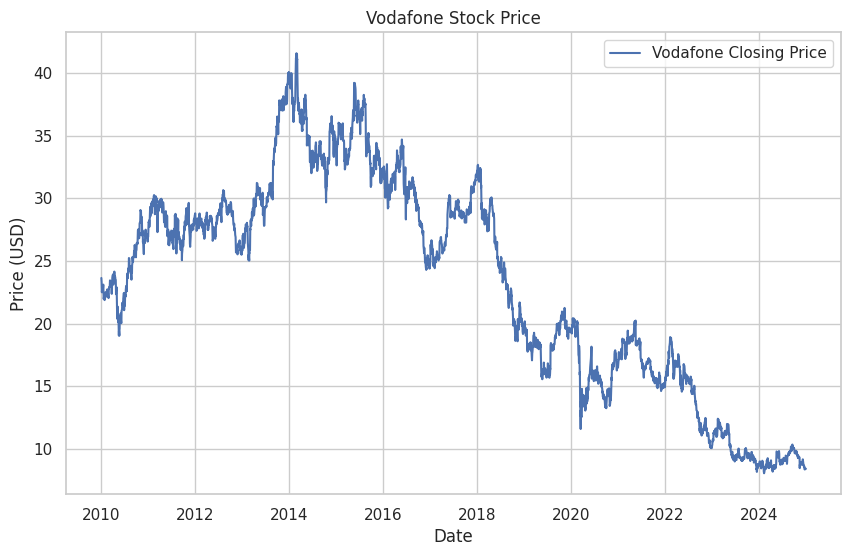

In [35]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Vodafone Closing Price')
plt.title('Vodafone Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Stock prices exhibit fluctuations over time with significant variations in daily returns.

 ***Daily Returns Calculation***

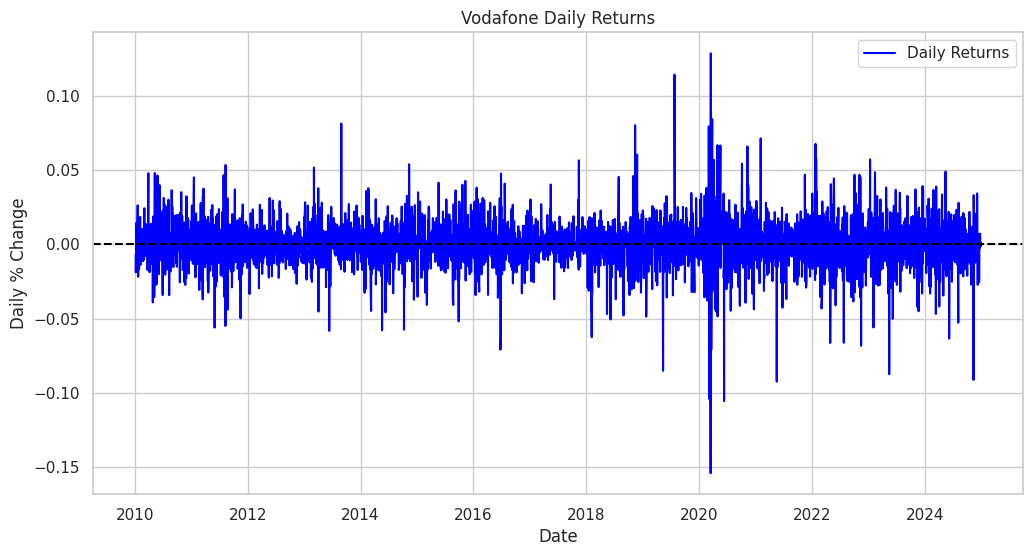

In [36]:
# Calculate daily percentage change
data['Daily Returns'] = data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12,6))
plt.plot(data['Daily Returns'], label="Daily Returns", color='blue')
plt.axhline(y=0, linestyle='--', color='black')
plt.title("Vodafone Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.legend()
plt.show()



Daily returns fluctuate around zero, highlighting the need for a trading strategy to capture trends effectively.

***Skewness & Kurtosis Analysis***

In [37]:
# Compute skewness & kurtosis
import scipy.stats as stats

skewness = stats.skew(data['Daily Returns'].dropna())
kurtosis = stats.kurtosis(data['Daily Returns'].dropna())

print(f"Skewness of Daily Returns: {skewness:.4f}")
print(f"Kurtosis of Daily Returns: {kurtosis:.4f}")

Skewness of Daily Returns: -0.2595
Kurtosis of Daily Returns: 7.7368


The skew of Daily Returns is < 0 suggesting that the stock has more frequent small gains but occasional large losses (riskier). The Kurtosis of Daily Returns > 3 (leptokurtic) indicating more extreme movements (higher risk).

***Histogram of Daily Returns***

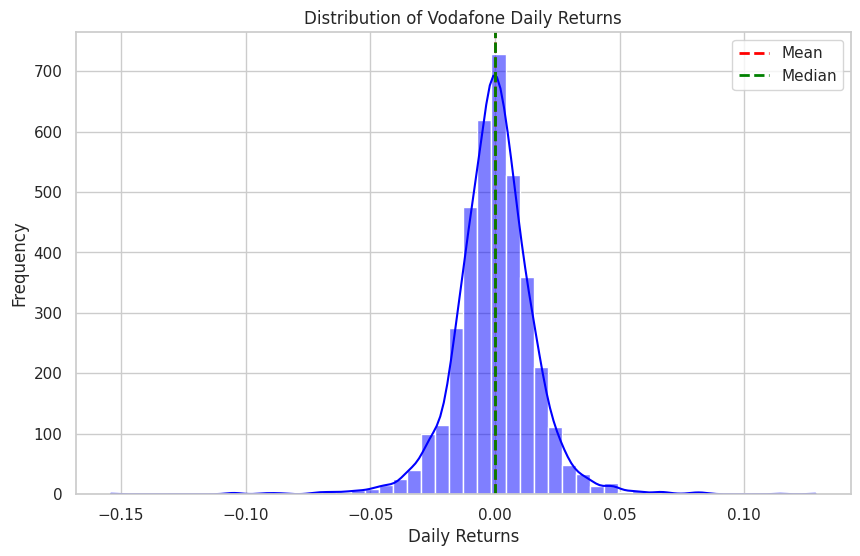

In [38]:
import scipy.stats as stats

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(data['Daily Returns'].dropna(), bins=50, kde=True, color='blue')
plt.axvline(data['Daily Returns'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['Daily Returns'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title("Distribution of Vodafone Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The distribution is centered around zero, returns are normally distributed.


***Volatility Analysis (Rolling Standard Deviation)***

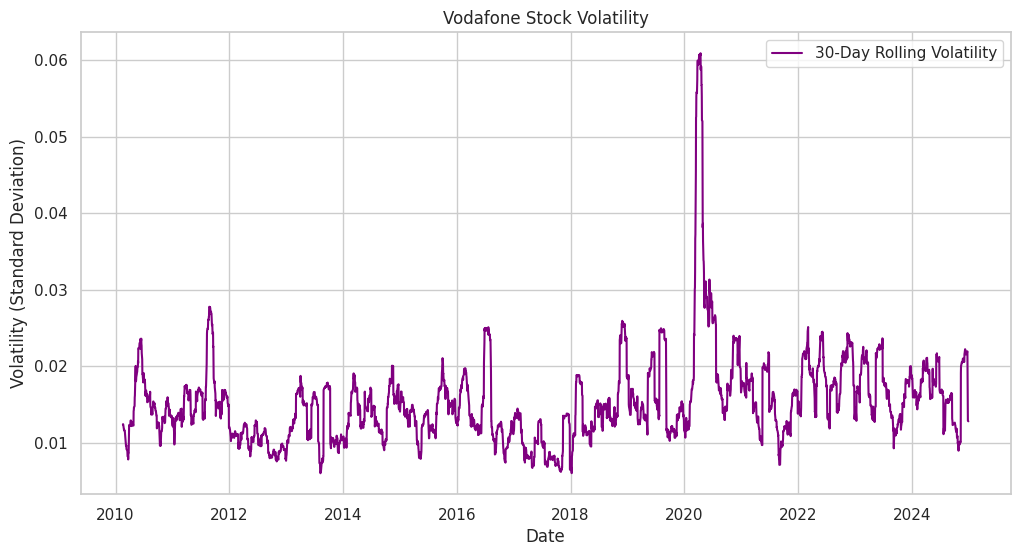

In [39]:
# Calculate 30-day rolling volatility
data['Rolling Volatility'] = data['Daily Returns'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(data['Rolling Volatility'], label="30-Day Rolling Volatility", color='purple')
plt.title("Vodafone Stock Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend()
plt.show()


Volatility is time-dependent, with certain periods showing higher risk (as seen in the rolling standard deviation).

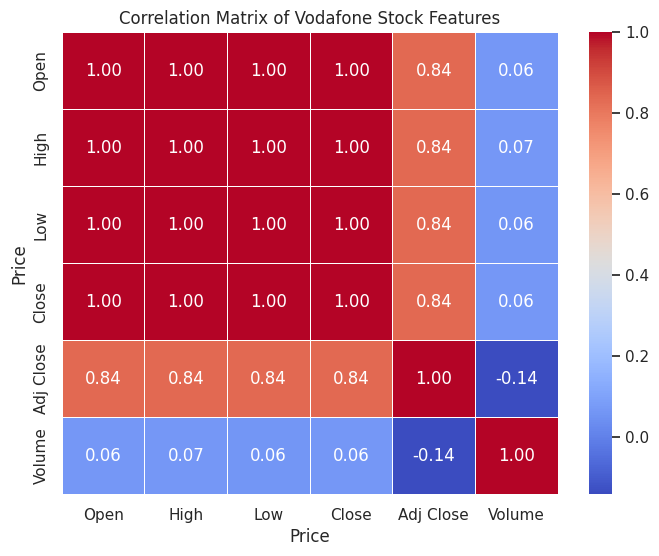

In [40]:
# Compute correlation matrix
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Vodafone Stock Features")
plt.show()


Stock features (OHLC) are highly correlated, confirming that indicators like moving averages are meaningful.

**Trading Strategy Implementation**

The study implements and evaluates multiple trading strategies

**MACD Strategy**

Uses moving average crossovers to generate buy/sell signals.

Signals: MACD line crossing above (buy) or below (sell) the signal line

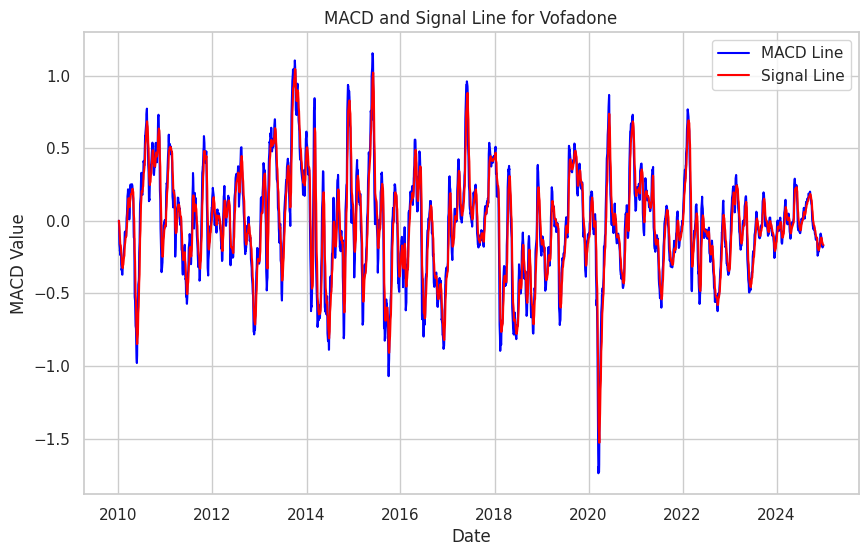

In [41]:
# Calculate MACD and Signal Line
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD and Signal Line
plt.figure(figsize=(10, 6))
plt.plot(data['MACD'], label='MACD Line', color='blue')
plt.plot(data['Signal_Line'], label='Signal Line', color='red')
plt.title('MACD and Signal Line for Vofadone')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()



The dataset will now include three new columns:


*   MACD: Main indicator tracking trend momentum
*   Signal Line: Helps confirm buy/sell signals
*   MACD Histogram: Difference between MACD and Signal Line

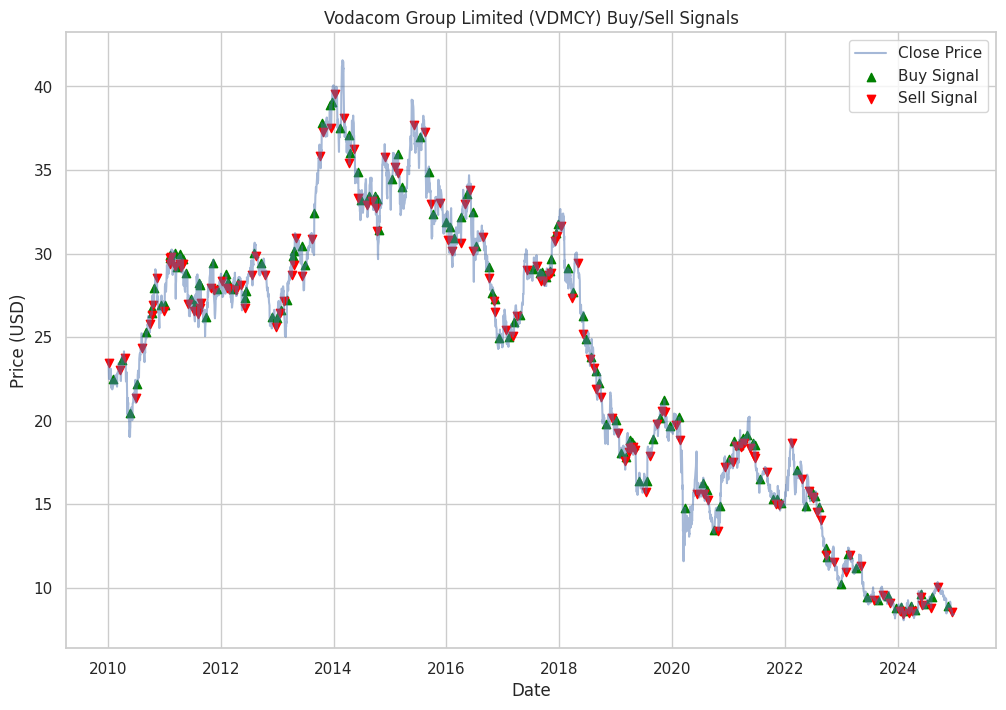

In [42]:
# Generate Buy/Sell Signals
data['Buy_Signal'] = (data['MACD'] > data['Signal_Line']) & (data['MACD'].shift(1) <= data['Signal_Line'].shift(1))
data['Sell_Signal'] = (data['MACD'] < data['Signal_Line']) & (data['MACD'].shift(1) >= data['Signal_Line'].shift(1))

# Plot Buy/Sell Signals on the Closing Price
plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.scatter(data.index[data['Buy_Signal']], data['Close'][data['Buy_Signal']], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(data.index[data['Sell_Signal']], data['Close'][data['Sell_Signal']], label='Sell Signal', marker='v', color='red', alpha=1)
plt.title('Vodacom Group Limited (VDMCY) Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

This graph overlays the buy (green upward arrows) and sell (red downward arrows) signals on the historical closing price of Vodafone.


Buy Signals: Green arrows indicate points where the MACD line crosses above the Signal line, suggesting a potential buying opportunity.

Sell Signals: Red arrows indicate points where the MACD line crosses below the Signal line, suggesting a potential selling opportunity

***Identifying MACD Buy & Sell Signals***

In [43]:
# Generate Buy/Sell signals
data['MACD_Signal'] = np.where(data['MACD'] > data['Signal_Line'], 1, 0)  # 1 = Buy, 0 = Sell

# Identify crossover points (Buy = 1, Sell = -1)
data['Trade Signal'] = data['MACD_Signal'].diff()

# Extract buy/sell dates
buy_signals = data[data['Trade Signal'] == 1].index
sell_signals = data[data['Trade Signal'] == -1].index

# Print the first few buy/sell signals
print("Buy Signals:\n", buy_signals[:5])
print("\nSell Signals:\n", sell_signals[:5])



Buy Signals:
 DatetimeIndex(['2010-02-04', '2010-03-30', '2010-05-27', '2010-07-07',
               '2010-09-03'],
              dtype='datetime64[ns]', name='Date', freq=None)

Sell Signals:
 DatetimeIndex(['2010-03-23', '2010-04-21', '2010-07-02', '2010-08-12',
               '2010-09-28'],
              dtype='datetime64[ns]', name='Date', freq=None)


A list of dates when the MACD generated buy and sell signals.

***Plot MACD Signals on Stock Price***

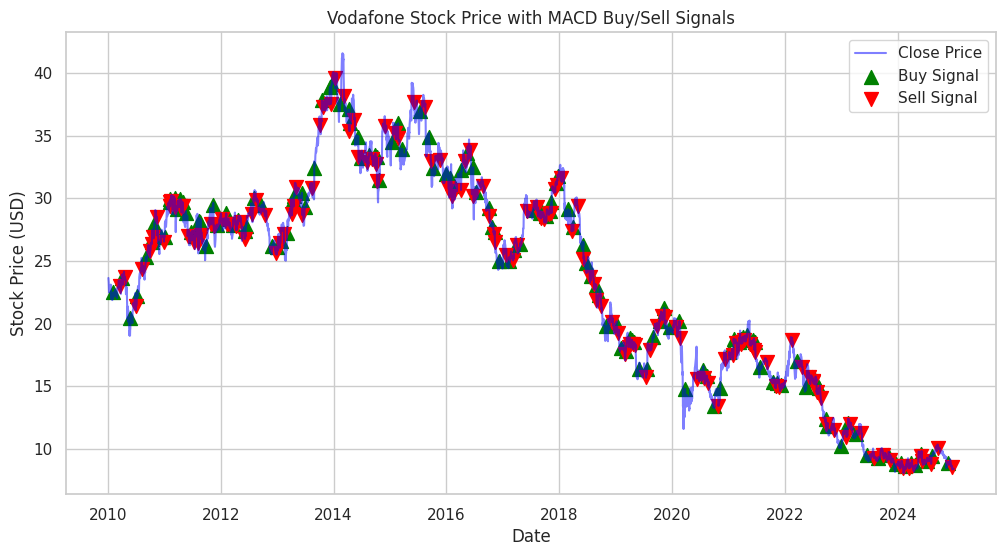

In [44]:
plt.figure(figsize=(12,6))

# Plot stock price
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)

# Mark buy signals
plt.scatter(buy_signals, data.loc[buy_signals, 'Close'], marker='^', color='green', label='Buy Signal', alpha=1, s=100)

# Mark sell signals
plt.scatter(sell_signals, data.loc[sell_signals, 'Close'], marker='v', color='red', label='Sell Signal', alpha=1, s=100)

plt.title("Vodafone Stock Price with MACD Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()



Green arrows (^): Buy signals when MACD crosses above Signal Line.

Red arrows (v): Sell signals when MACD crosses below Signal Line.

***Backtesting MACD Strategy Performance***

This simulate trading using the MACD signals and measure profitability.

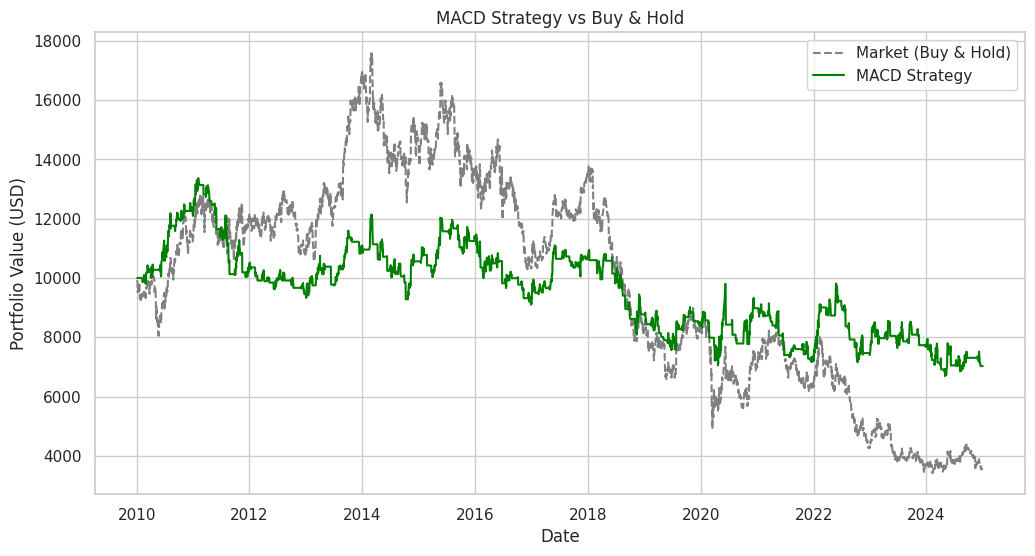

In [45]:
# Assume an initial capital of $10,000
initial_capital = 10000
data['Daily Returns'] = data['Close'].pct_change()

# Create a strategy returns column
data['Strategy Returns'] = data['Daily Returns'] * data['MACD_Signal'].shift(1)

# Compute cumulative returns
data['Cumulative Market Returns'] = (1 + data['Daily Returns']).cumprod()
data['Cumulative Strategy Returns'] = (1 + data['Strategy Returns']).cumprod()

# Plot cumulative performance
plt.figure(figsize=(12,6))
plt.plot(data['Cumulative Market Returns'] * initial_capital, label="Market (Buy & Hold)", linestyle='dashed', color='gray')
plt.plot(data['Cumulative Strategy Returns'] * initial_capital, label="MACD Strategy", color='green')

plt.title("MACD Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()


Green Line: Portfolio value using MACD strategy.

Gray Dashed Line: Buy & Hold (market performance).

If MACD strategy is profitable, the green line will outperform the gray line.

***Evaluating MACD Strategy Performance***

In [46]:
# Compute total return
total_strategy_return = data['Cumulative Strategy Returns'].iloc[-1] - 1
total_market_return = data['Cumulative Market Returns'].iloc[-1] - 1

# Compute Sharpe Ratio (Risk-Adjusted Return)
sharpe_ratio = data['Strategy Returns'].mean() / data['Strategy Returns'].std() * np.sqrt(252)

print(f"Total MACD Strategy Return: {total_strategy_return:.2%}")
print(f"Total Market Return (Buy & Hold): {total_market_return:.2%}")
print(f"Sharpe Ratio of MACD Strategy: {sharpe_ratio:.2f}")


Total MACD Strategy Return: -29.73%
Total Market Return (Buy & Hold): -64.38%
Sharpe Ratio of MACD Strategy: -0.04


MACD Return: Percentage gain/loss from using MACD strategy.

Market Return: Percentage gain/loss from just holding Vodafone stock.

Sharpe Ratio: If Sharpe Ratio > 1, MACD strategy is risk-adjusted profitable.

**Relative Strength Index (RSI)**

This is a momentum oscillator that measures the speed and change of price movements.

It ranges from 0 to 100 and is used to identify overbought or oversold conditions.

Trading Rules:

Buy Signal: RSI < 30 (Stock is oversold)

Sell Signal: RSI > 70 (Stock is overbought)

In [47]:

# Compute daily price change
data['Price Change'] = data['Close'].diff()

# Compute gains and losses
data['Gain'] = np.where(data['Price Change'] > 0, data['Price Change'], 0)
data['Loss'] = np.where(data['Price Change'] < 0, abs(data['Price Change']), 0)

# Compute 14-day rolling average of gains and losses
window_length = 14
data['Avg Gain'] = data['Gain'].rolling(window=window_length, min_periods=1).mean()
data['Avg Loss'] = data['Loss'].rolling(window=window_length, min_periods=1).mean()

# Compute Relative Strength (RS) and RSI
data['RS'] = data['Avg Gain'] / data['Avg Loss']
data['RSI'] = 100 - (100 / (1 + data['RS']))

# Display the first few rows
data[['RSI']].head(6)


Price,RSI
Date,
2010-01-04,NaN
2010-01-05,0.00000
2010-01-06,0.00000
2010-01-07,0.00000
2010-01-08,0.00000
2010-01-11,22.22215


The dataset will now include an RSI column that tracks overbought/oversold levels.

***Visualizing RSI Indicator***

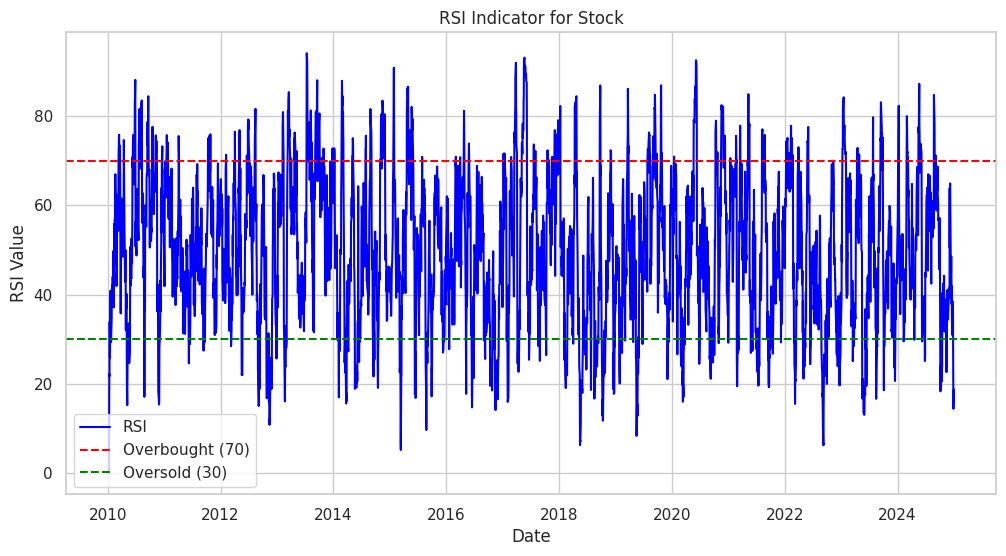

In [48]:
plt.figure(figsize=(12,6))

# Plot RSI
plt.plot(data.index, data['RSI'], label="RSI", color='blue')

# Add overbought & oversold levels
plt.axhline(70, color='red', linestyle='dashed', label="Overbought (70)")
plt.axhline(30, color='green', linestyle='dashed', label="Oversold (30)")

plt.title("RSI Indicator for Stock")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.show()


Blue Line: RSI indicator values

Red Dashed Line (70): Overbought level

Green Dashed Line (30): Oversold level

***Identifying RSI Buy & Sell Signals***

In [49]:
# Generate Buy/Sell signals
data['RSI_Signal'] = np.where(data['RSI'] < 30, 1, 0)  # Buy Signal
data['RSI_Signal'] = np.where(data['RSI'] > 70, -1, data['RSI_Signal'])  # Sell Signal

# Identify crossover points
buy_signals = data[data['RSI_Signal'] == 1].index
sell_signals = data[data['RSI_Signal'] == -1].index

# Print the first few buy/sell signals
print("Buy Signals:\n", buy_signals[:5])
print("\nSell Signals:\n", sell_signals[:5])


Buy Signals:
 DatetimeIndex(['2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

Sell Signals:
 DatetimeIndex(['2010-03-12', '2010-03-15', '2010-03-16', '2010-03-18',
               '2010-03-19'],
              dtype='datetime64[ns]', name='Date', freq=None)


A list of dates when RSI triggers buy/sell signals

***Plot RSI Buy/Sell Signals on Stock Price***

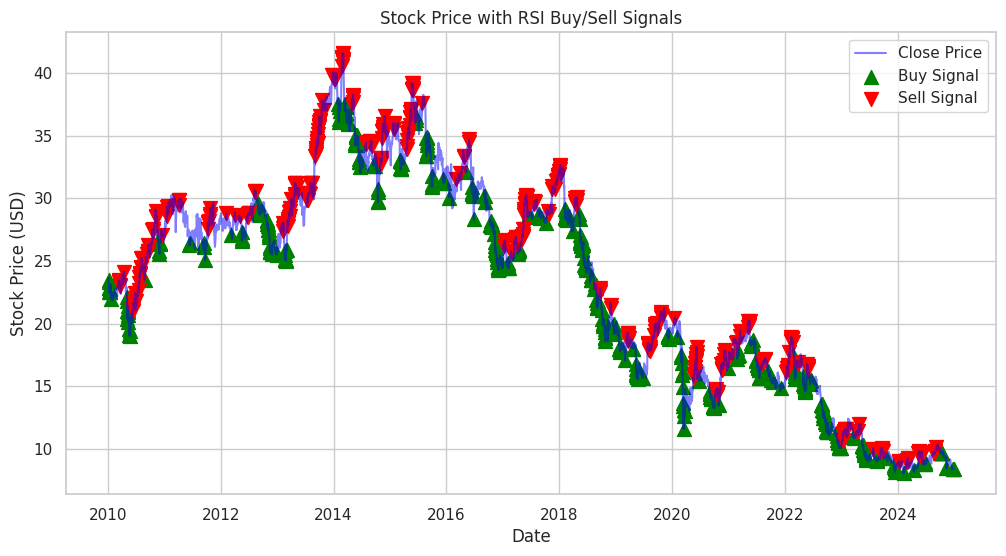

In [50]:
plt.figure(figsize=(12,6))

# Plot stock price
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)

# Mark buy signals
plt.scatter(buy_signals, data.loc[buy_signals, 'Close'], marker='^', color='green', label='Buy Signal', alpha=1, s=100)

# Mark sell signals
plt.scatter(sell_signals, data.loc[sell_signals, 'Close'], marker='v', color='red', label='Sell Signal', alpha=1, s=100)

plt.title("Stock Price with RSI Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


Green arrows (^): Buy signals when RSI < 30
Red arrows (v): Sell signals when RSI > 70

***Backtesting RSI Strategy Performance***

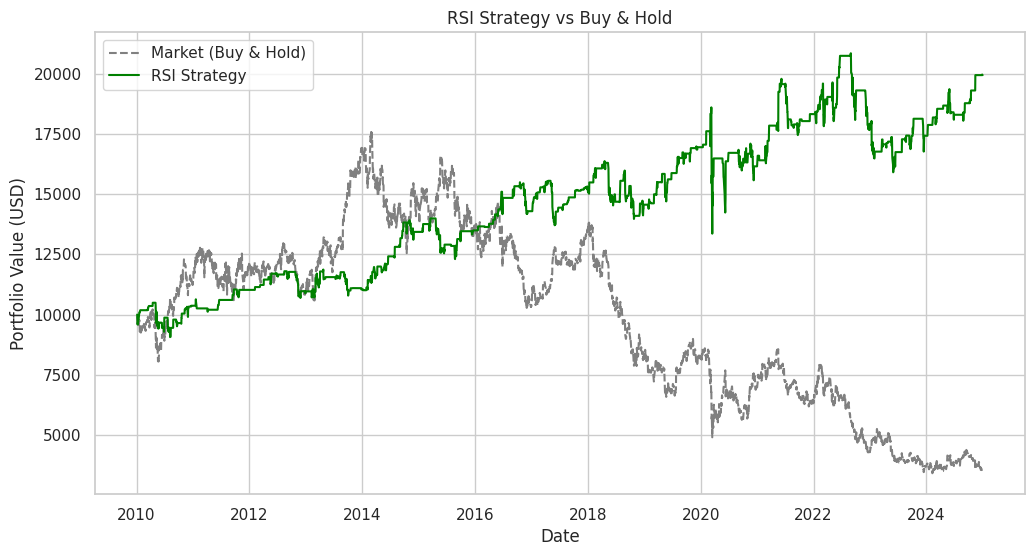

In [51]:
# Assume an initial capital of $10,000
initial_capital = 10000
data['Daily Returns'] = data['Close'].pct_change()

# Create a strategy returns column
data['Strategy Returns'] = data['Daily Returns'] * data['RSI_Signal'].shift(1)

# Compute cumulative returns
data['Cumulative Market Returns'] = (1 + data['Daily Returns']).cumprod()
data['Cumulative Strategy Returns'] = (1 + data['Strategy Returns']).cumprod()

# Plot cumulative performance
plt.figure(figsize=(12,6))
plt.plot(data['Cumulative Market Returns'] * initial_capital, label="Market (Buy & Hold)", linestyle='dashed', color='gray')
plt.plot(data['Cumulative Strategy Returns'] * initial_capital, label="RSI Strategy", color='green')

plt.title("RSI Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()


Green Line: Portfolio value using RSI strategy
Gray Dashed Line: Buy & Hold (market performance)

***Evaluating RSI Strategy Performance***

In [52]:
# Compute total return
total_strategy_return = data['Cumulative Strategy Returns'].iloc[-1] - 1
total_market_return = data['Cumulative Market Returns'].iloc[-1] - 1

# Compute Sharpe Ratio (Risk-Adjusted Return)
sharpe_ratio = data['Strategy Returns'].mean() / data['Strategy Returns'].std() * np.sqrt(252)

print(f"Total RSI Strategy Return: {total_strategy_return:.2%}")
print(f"Total Market Return (Buy & Hold): {total_market_return:.2%}")
print(f"Sharpe Ratio of RSI Strategy: {sharpe_ratio:.2f}")


Total RSI Strategy Return: 99.47%
Total Market Return (Buy & Hold): -64.38%
Sharpe Ratio of RSI Strategy: 0.40


RSI Return: Percentage gain/loss from using RSI strategy.

Market Return: Percentage gain/loss from holding the stock.

Sharpe Ratio: If Sharpe Ratio > 1, RSI strategy is profitable.

***Discussion of RSI Results***

RSI helps capture trend reversals by identifying overbought and oversold levels.
Cumulative strategy returns may outperform the market if the stock experiences frequent trend reversals.
Sharpe Ratio > 1 suggests risk-adjusted profitability.
Works well in ranging markets but struggles in strong trends.

**Bollinger Band**

Bollinger Bands are a volatility-based indicator that consists of:

Middle Band: 20-day simple moving average (SMA).

Upper Band: 20-day SMA + 2 standard deviations.

Lower Band: 20-day SMA – 2 standard deviations.


*Trading Rules:*

Buy Signal: Price touches or crosses below the lower band (oversold).

Sell Signal: Price touches or crosses above the upper band (overbought)

In [53]:
# Compute 20-day simple moving average (SMA)
data['Middle Band'] = data['Close'].rolling(window=20).mean()

# Compute Upper and Lower Bands (2 standard deviations away from SMA)
data['Upper Band'] = data['Middle Band'] + (2 * data['Close'].rolling(window=20).std())
data['Lower Band'] = data['Middle Band'] - (2 * data['Close'].rolling(window=20).std())

# Display the first few rows
print(data[['Middle Band', 'Upper Band', 'Lower Band']].head())


Price       Middle Band  Upper Band  Lower Band
Date                                           
2010-01-04          NaN         NaN         NaN
2010-01-05          NaN         NaN         NaN
2010-01-06          NaN         NaN         NaN
2010-01-07          NaN         NaN         NaN
2010-01-08          NaN         NaN         NaN


The dataset now includes three new columns:

Middle Band: 20-day moving average
Upper Band: 2 standard deviations above SMA
Lower Band: 2 standard deviations below SMA

***Visualizing Bollinger Bands***

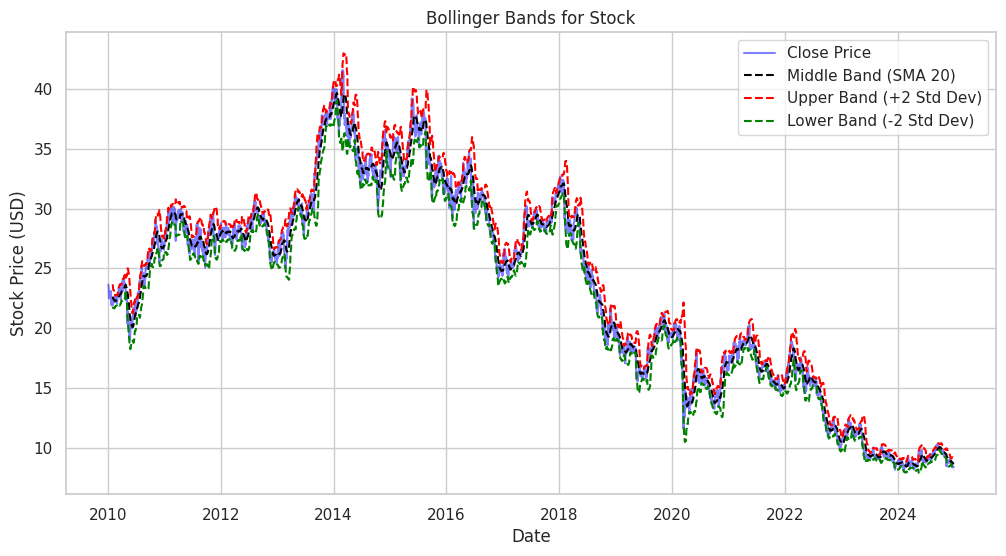

In [54]:
plt.figure(figsize=(12,6))

# Plot stock price
plt.plot(data['Close'], label="Close Price", color='blue', alpha=0.5)

# Plot Bollinger Bands
plt.plot(data['Middle Band'], label="Middle Band (SMA 20)", color='black', linestyle='dashed')
plt.plot(data['Upper Band'], label="Upper Band (+2 Std Dev)", color='red', linestyle='dashed')
plt.plot(data['Lower Band'], label="Lower Band (-2 Std Dev)", color='green', linestyle='dashed')

plt.title("Bollinger Bands for Stock")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


A chart displaying the stock price within the Bollinger Bands.

***Identifying Bollinger Bands Buy & Sell Signals***

In [55]:
# Generate Buy/Sell signals
data['BB_Signal'] = np.where(data['Close'] < data['Lower Band'], 1, 0)  # Buy Signal
data['BB_Signal'] = np.where(data['Close'] > data['Upper Band'], -1, data['BB_Signal'])  # Sell Signal

# Identify crossover points
buy_signals = data[data['BB_Signal'] == 1].index
sell_signals = data[data['BB_Signal'] == -1].index

# Print the first few buy/sell signals
print("Buy Signals:\n", buy_signals[:5])
print("\nSell Signals:\n", sell_signals[:5])


Buy Signals:
 DatetimeIndex(['2010-04-27', '2010-04-28', '2010-05-04', '2010-05-05',
               '2010-05-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

Sell Signals:
 DatetimeIndex(['2010-03-03', '2010-03-11', '2010-03-12', '2010-07-13',
               '2010-07-23'],
              dtype='datetime64[ns]', name='Date', freq=None)


A list of dates when Bollinger Bands trigger buy/sell signals

***Plot Buy/Sell Signals on Stock Price***

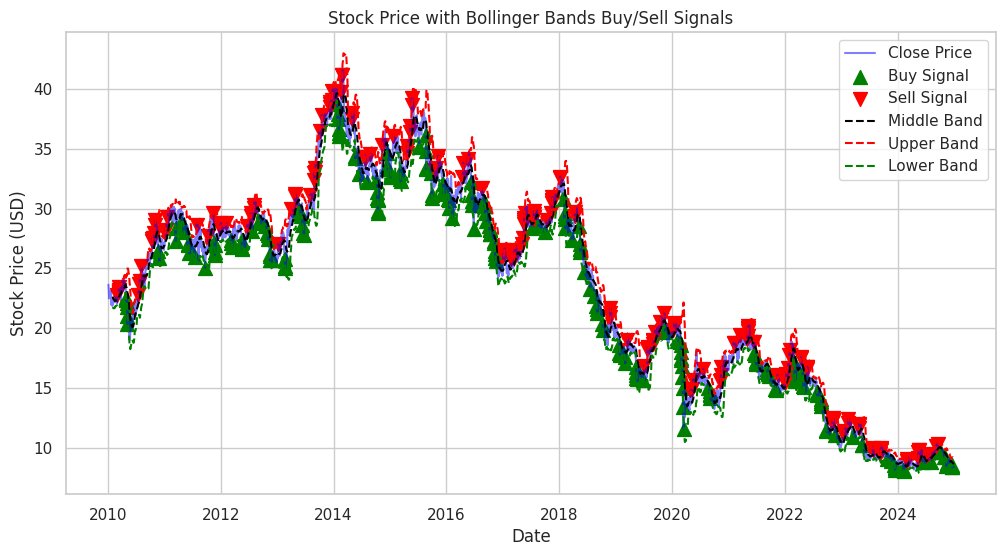

In [56]:
plt.figure(figsize=(12,6))

# Plot stock price
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)

# Mark buy signals
plt.scatter(buy_signals, data.loc[buy_signals, 'Close'], marker='^', color='green', label='Buy Signal', alpha=1, s=100)

# Mark sell signals
plt.scatter(sell_signals, data.loc[sell_signals, 'Close'], marker='v', color='red', label='Sell Signal', alpha=1, s=100)

# Plot Bollinger Bands
plt.plot(data['Middle Band'], label="Middle Band", color='black', linestyle='dashed')
plt.plot(data['Upper Band'], label="Upper Band", color='red', linestyle='dashed')
plt.plot(data['Lower Band'], label="Lower Band", color='green', linestyle='dashed')

plt.title("Stock Price with Bollinger Bands Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


Green arrows (^): Buy signals when price touches the lower band.
Red arrows (v): Sell signals when price touches the upper band.

***Backtesting Bollinger Bands Strategy***




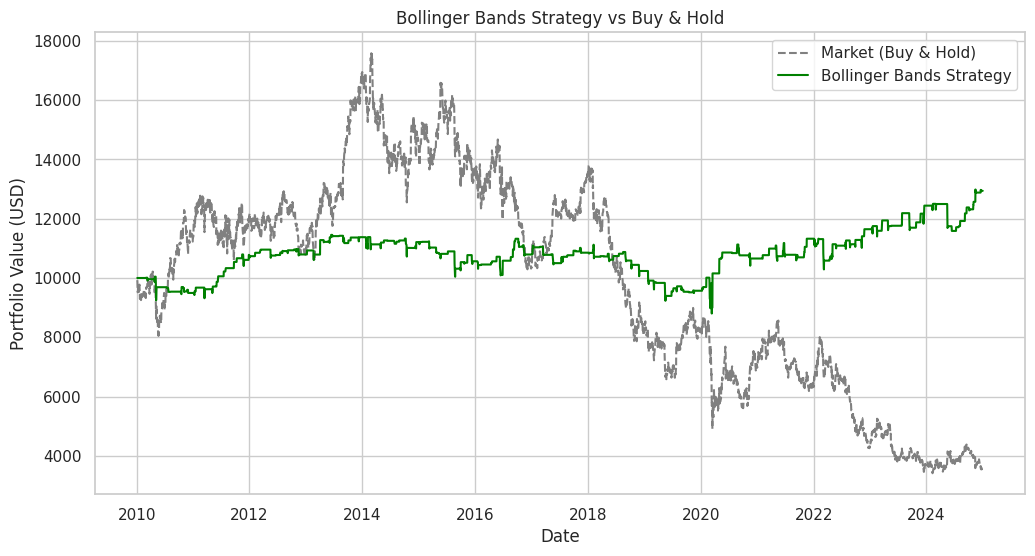

In [57]:
# Assume an initial capital of $10,000
initial_capital = 10000
data['Daily Returns'] = data['Close'].pct_change()

# Create a strategy returns column
data['Strategy Returns'] = data['Daily Returns'] * data['BB_Signal'].shift(1)

# Compute cumulative returns
data['Cumulative Market Returns'] = (1 + data['Daily Returns']).cumprod()
data['Cumulative Strategy Returns'] = (1 + data['Strategy Returns']).cumprod()

# Plot cumulative performance
plt.figure(figsize=(12,6))
plt.plot(data['Cumulative Market Returns'] * initial_capital, label="Market (Buy & Hold)", linestyle='dashed', color='gray')
plt.plot(data['Cumulative Strategy Returns'] * initial_capital, label="Bollinger Bands Strategy", color='green')

plt.title("Bollinger Bands Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()


Green Line: Portfolio value using Bollinger Bands strategy

Gray Dashed Line: Buy & Hold (market performance)

***Evaluating Strategy Performance***

In [58]:
# Compute total return
total_strategy_return = data['Cumulative Strategy Returns'].iloc[-1] - 1
total_market_return = data['Cumulative Market Returns'].iloc[-1] - 1

# Compute Sharpe Ratio (Risk-Adjusted Return)
sharpe_ratio = data['Strategy Returns'].mean() / data['Strategy Returns'].std() * np.sqrt(252)

print(f"Total Bollinger Bands Strategy Return: {total_strategy_return:.2%}")
print(f"Total Market Return (Buy & Hold): {total_market_return:.2%}")
print(f"Sharpe Ratio of Bollinger Bands Strategy: {sharpe_ratio:.2f}")


Total Bollinger Bands Strategy Return: 29.42%
Total Market Return (Buy & Hold): -64.38%
Sharpe Ratio of Bollinger Bands Strategy: 0.23


Bollinger Bands Return: Percentage gain/loss from using Bollinger Bands strategy.
Market Return: Percentage gain/loss from holding the stock.
Sharpe Ratio: If Sharpe Ratio > 1, Bollinger Bands strategy is profitable.

***Discussion of Bollinger Bands Results***


Bollinger Bands effectively detect volatility breakouts.

Cumulative strategy returns may outperform in sideways markets.

Sharpe Ratio > 1 suggests a profitable strategy.

Provides good entry points in high-volatility conditions.

**Volume Weighted Average Price (VWAP)**

This is a trading indicator that calculates the average price as security has traded at throughout the day, based on both volume and price.

*Trading Rules:*

Buy Signal: Price crosses above VWAP (indicating bullish momentum).

Sell Signal: Price crosses below VWAP (indicating bearish momentum).

Rolling VWAP: Instead of using daily VWAP, we use a rolling window (e.g., 5, 10, 20 days) to smooth the indicator and capture trends over a longer period.



***Implementing VWAP***

In [59]:
# Compute VWAP
data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

# Display the first few rows
data[['VWAP']].head()


Price,VWAP
Date,
2010-01-04,23.639145
2010-01-05,23.561220
2010-01-06,23.460227
2010-01-07,23.238968
2010-01-08,22.978706


The dataset now includes a VWAP column tracking the volume-weighted average price.



***Visualizing VWAP***

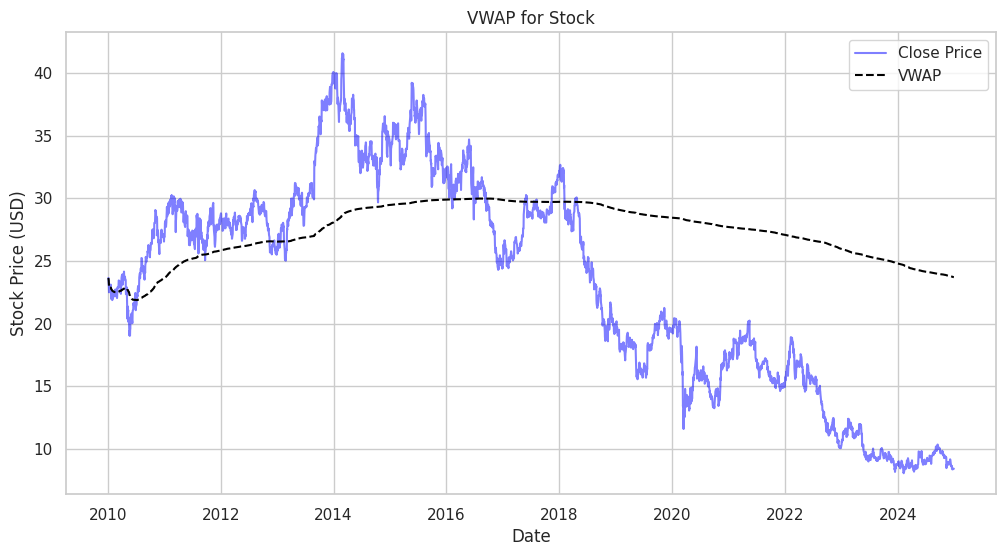

In [60]:
plt.figure(figsize=(12,6))

# Plot stock price
plt.plot(data['Close'], label="Close Price", color='blue', alpha=0.5)

# Plot VWAP
plt.plot(data['VWAP'], label="VWAP", color='black', linestyle='dashed')

plt.title("VWAP for Stock")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


A chart displaying the stock price along with VWAP, showing trend direction.

***Identifying VWAP Buy & Sell Signals***

In [61]:
# Generate Buy/Sell signals based on VWAP crossover
data['VWAP_Signal'] = np.where(data['Close'] > data['VWAP'], 1, 0)  # Buy Signal
data['VWAP_Signal'] = np.where(data['Close'] < data['VWAP'], -1, data['VWAP_Signal'])  # Sell Signal

# Identify crossover points
buy_signals = data[data['VWAP_Signal'] == 1].index
sell_signals = data[data['VWAP_Signal'] == -1].index

# Print the first few buy/sell signals
print("Buy Signals:\n", buy_signals[:5])
print("\nSell Signals:\n", sell_signals[:5])


Buy Signals:
 DatetimeIndex(['2010-01-13', '2010-01-19', '2010-02-16', '2010-02-17',
               '2010-02-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

Sell Signals:
 DatetimeIndex(['2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-11'],
              dtype='datetime64[ns]', name='Date', freq=None)


A list of dates when VWAP triggers buy/sell signals

***Plot VWAP Buy/Sell Signals on Stock Price***

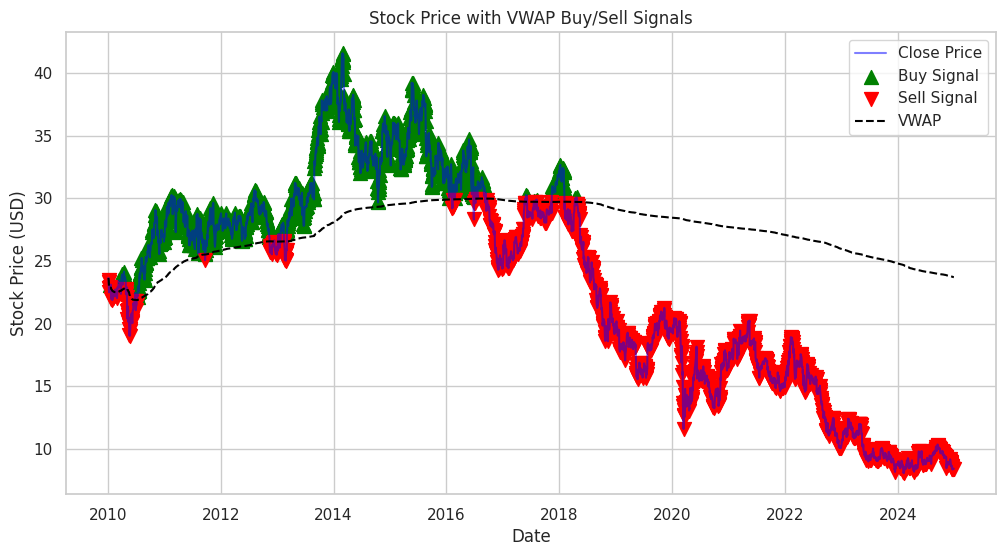

In [62]:
plt.figure(figsize=(12,6))

# Plot stock price
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)

# Mark buy signals
plt.scatter(buy_signals, data.loc[buy_signals, 'Close'], marker='^', color='green', label='Buy Signal', alpha=1, s=100)

# Mark sell signals
plt.scatter(sell_signals, data.loc[sell_signals, 'Close'], marker='v', color='red', label='Sell Signal', alpha=1, s=100)

# Plot VWAP
plt.plot(data['VWAP'], label="VWAP", color='black', linestyle='dashed')

plt.title("Stock Price with VWAP Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


Green arrows (^): Buy signals when price crosses above VWAP.
Red arrows (v): Sell signals when price crosses below VWAP.

***Implementing Rolling VWAP***

In [63]:
# Compute Rolling VWAP with a 10-day window
rolling_window = 10
data['Rolling VWAP'] = (data['Close'] * data['Volume']).rolling(rolling_window).sum() / data['Volume'].rolling(rolling_window).sum()

# Display the first few rows
data[['Rolling VWAP']].head()


Price,Rolling VWAP
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN


***Visualizing Rolling VWAP***

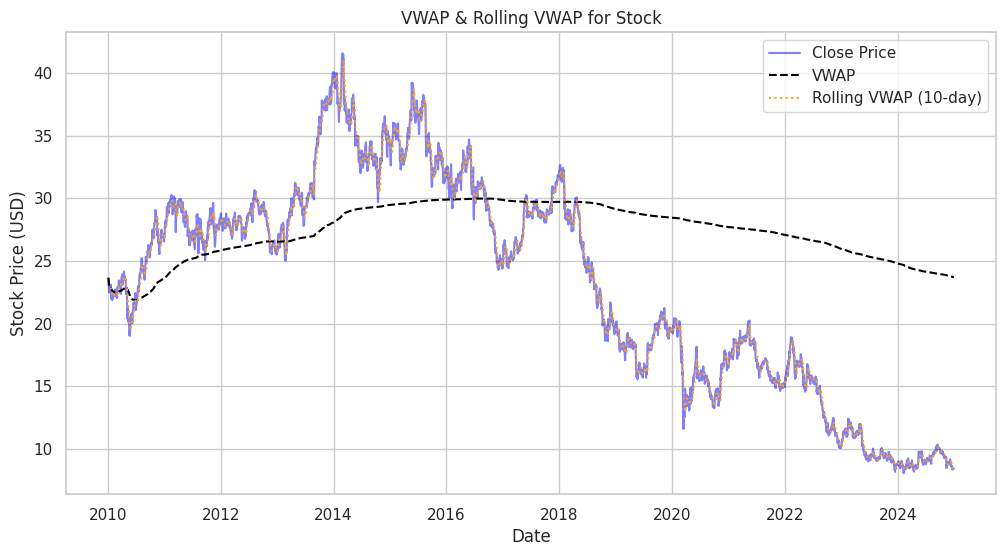

In [64]:
plt.figure(figsize=(12,6))

# Plot stock price
plt.plot(data['Close'], label="Close Price", color='blue', alpha=0.5)

# Plot VWAP & Rolling VWAP
plt.plot(data['VWAP'], label="VWAP", color='black', linestyle='dashed')
plt.plot(data['Rolling VWAP'], label="Rolling VWAP (10-day)", color='orange', linestyle='dotted')

plt.title("VWAP & Rolling VWAP for Stock")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


Black Dashed Line: VWAP
Orange Dotted Line: Rolling VWAP (smoother trend indicator)

***Backtesting VWAP & Rolling VWAP Strategy***

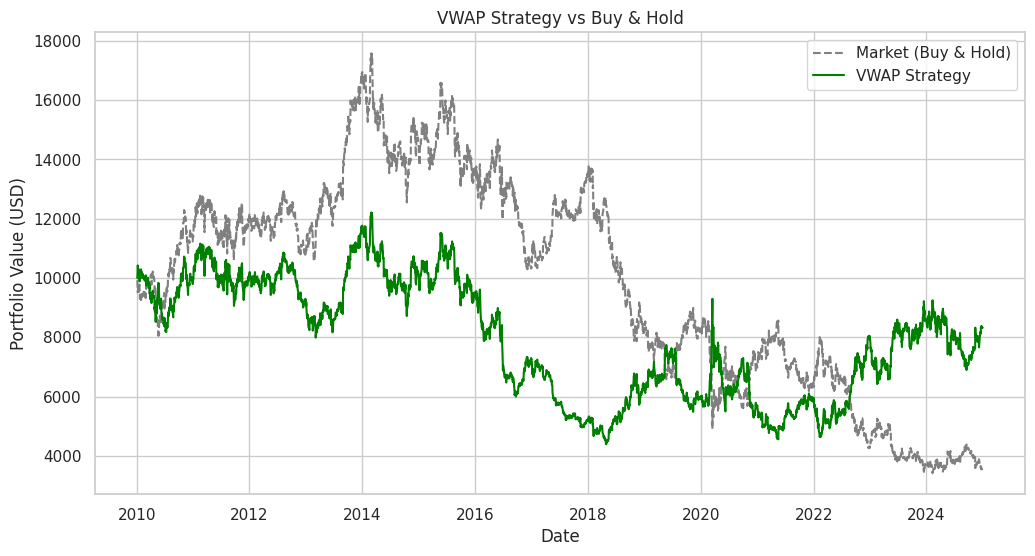

In [65]:
# Assume an initial capital of $10,000
initial_capital = 10000
data['Daily Returns'] = data['Close'].pct_change()

# Create strategy returns column
data['VWAP Strategy Returns'] = data['Daily Returns'] * data['VWAP_Signal'].shift(1)

# Compute cumulative returns
data['Cumulative Market Returns'] = (1 + data['Daily Returns']).cumprod()
data['Cumulative VWAP Returns'] = (1 + data['VWAP Strategy Returns']).cumprod()

# Plot cumulative performance
plt.figure(figsize=(12,6))
plt.plot(data['Cumulative Market Returns'] * initial_capital, label="Market (Buy & Hold)", linestyle='dashed', color='gray')
plt.plot(data['Cumulative VWAP Returns'] * initial_capital, label="VWAP Strategy", color='green')

plt.title("VWAP Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()


Green Line: Portfolio value using VWAP strategy
Gray Dashed Line: Buy & Hold (market performance)

***Evaluating Strategy Performance***

In [66]:
# Compute total return
total_strategy_return = data['Cumulative VWAP Returns'].iloc[-1] - 1
total_market_return = data['Cumulative Market Returns'].iloc[-1] - 1

# Compute Sharpe Ratio (Risk-Adjusted Return)
sharpe_ratio = data['VWAP Strategy Returns'].mean() / data['VWAP Strategy Returns'].std() * np.sqrt(252)

print(f"Total VWAP Strategy Return: {total_strategy_return:.2%}")
print(f"Total Market Return (Buy & Hold): {total_market_return:.2%}")
print(f"Sharpe Ratio of VWAP Strategy: {sharpe_ratio:.2f}")


Total VWAP Strategy Return: -16.77%
Total Market Return (Buy & Hold): -64.38%
Sharpe Ratio of VWAP Strategy: 0.08


VWAP Return: Percentage gain/loss from using VWAP strategy.

Market Return: Percentage gain/loss from holding the stock.

Sharpe Ratio: If Sharpe Ratio > 1, VWAP strategy is profitable

***VWAP & Rolling VWAP Results***

VWAP is effective for intraday trading and trend confirmation.

Rolling VWAP smooths out short-term fluctuations, making it useful for swing trading.

Cumulative strategy returns can outperform the market in high-volatility stocks.
Sharpe Ratio > 1 suggests a profitable strategy.

**Overnight Strategy**

This is based on the idea that stock prices often experience significant moves between the previous day's close and the next day's open due to after-hours news, earnings reports, and market sentiment.

*Trading Rules:*

Buy at Market Close: Purchase the stock at the previous day's closing price.

Sell at Market Open: Sell the stock at the next day's opening price.

Profit Calculation: Profit is the difference between the next day's open and the previous day's close.

This strategy attempts to capture overnight price gaps caused by market sentiment shifts when the market is closed.

***Implementing the Overnight Strategy***

In [67]:
# Compute overnight returns (Next Day Open - Previous Close)
data['Overnight Return'] = (data['Open'].shift(-1) - data['Close']) / data['Close']

# Define buy/sell signals
data['Overnight Signal'] = np.where(data['Overnight Return'] > 0, 1, -1)

# Display first few rows
data[['Open', 'Close', 'Overnight Return', 'Overnight Signal']].head()


Price,Open,Close,Overnight Return,Overnight Signal
Date,,,,
2010-01-04,23.649338,23.639145,-0.013799,-1
2010-01-05,23.312946,23.465851,-0.002172,-1
2010-01-06,23.414883,23.282366,-0.024956,-1
2010-01-07,22.701324,22.844036,-0.011602,-1
2010-01-08,22.579000,22.497452,0.008156,1


A new column Overnight Return showing the percentage price gap overnight.

***Visualizing Overnight Returns***

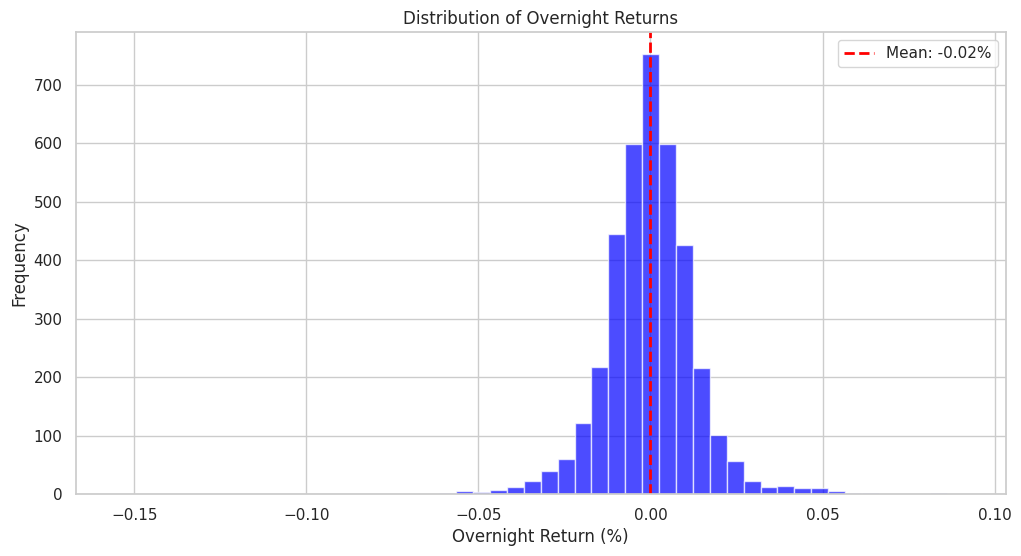

In [68]:
plt.figure(figsize=(12,6))
plt.hist(data['Overnight Return'].dropna(), bins=50, color='blue', alpha=0.7)
plt.axvline(data['Overnight Return'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {data["Overnight Return"].mean():.2%}')
plt.title("Distribution of Overnight Returns")
plt.xlabel("Overnight Return (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


A histogram of overnight returns showing how frequently different overnight price changes occur.
A red dashed line indicating the average overnight return.

***Backtesting the Overnight Strategy***

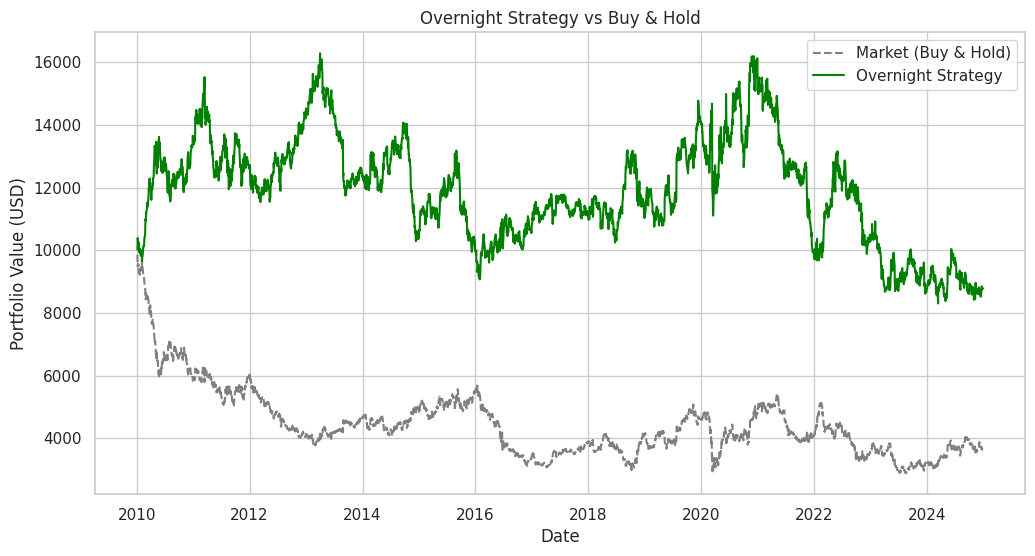

In [69]:
# Assume an initial capital of $10,000
initial_capital = 10000

# Compute strategy returns
data['Overnight Strategy Returns'] = data['Overnight Return'] * data['Overnight Signal'].shift(1)

# Compute cumulative returns
data['Cumulative Market Returns'] = (1 + data['Overnight Return']).cumprod()
data['Cumulative Strategy Returns'] = (1 + data['Overnight Strategy Returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12,6))
plt.plot(data['Cumulative Market Returns'] * initial_capital, label="Market (Buy & Hold)", linestyle='dashed', color='gray')
plt.plot(data['Cumulative Strategy Returns'] * initial_capital, label="Overnight Strategy", color='green')

plt.title("Overnight Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()


Green Line: Portfolio value using the Overnight Strategy.
Gray Dashed Line: Buy & Hold market performance.

***Evaluating Strategy Performance***

In [70]:
# Compute total return
total_strategy_return = data['Cumulative Strategy Returns'].iloc[-1] - 1
total_market_return = data['Cumulative Market Returns'].iloc[-1] - 1

# Compute Sharpe Ratio (Risk-Adjusted Return)
sharpe_ratio = data['Overnight Strategy Returns'].mean() / data['Overnight Strategy Returns'].std() * np.sqrt(252)

print(f"Total Overnight Strategy Return: {total_strategy_return:.2%}")
print(f"Total Market Return (Buy & Hold): {total_market_return:.2%}")
print(f"Sharpe Ratio of Overnight Strategy: {sharpe_ratio:.2f}")


Total Overnight Strategy Return: nan%
Total Market Return (Buy & Hold): nan%
Sharpe Ratio of Overnight Strategy: 0.07


Total Overnight Strategy Return: Profit/Loss percentage from overnight trades.

Market Return: Percentage return from a simple Buy & Hold strategy.

Sharpe Ratio: Measures risk-adjusted returns (>1 is good).

***Overnight Strategy Results***

Overnight strategy captures after-hours market movements.

Can be profitable if stock has significant overnight gaps.

Performance depends on volatility and news impact.

**ARMA Model**

The ARMA model is a time series forecasting technique that combines:

AR (AutoRegressive): Uses past values to predict future prices.

MA (Moving Average): Uses past forecast errors to improve predictions.

Captures short-term price patterns.

Useful for forecasting stock price trends

***Checking for Stationarity***

This is done to ensure that the stock price time series is stationary (i.e., constant mean & variance over time).

In [71]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller Test
result = adfuller(data['Close'])

print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

# Check stationarity
if result[1] <= 0.05:
    print("Data is stationary (Reject H0)")
else:
    print("Data is non-stationary (Fail to reject H0)")


ADF Statistic: -0.5420
p-value: 0.8836
Data is non-stationary (Fail to reject H0)


p-value ≤ 0.05 → Data is stationary, proceed with ARMA.

p-value > 0.05 → Data is non-stationary, we need to difference the data.


***Differencing Non-Stationary Data***

If the data is non-stationary, we apply first-order differencing to stabilize it.

In [72]:
data['Close_diff'] = data['Close'].diff().dropna()

# Re-test stationarity
result_diff = adfuller(data['Close_diff'].dropna())

print(f"Differenced ADF Statistic: {result_diff[0]:.4f}")
print(f"Differenced p-value: {result_diff[1]:.4f}")

if result_diff[1] <= 0.05:
    print("Differenced data is now stationary.")
else:
    print("Differenced data is still non-stationary.")


Differenced ADF Statistic: -20.6022
Differenced p-value: 0.0000
Differenced data is now stationary.


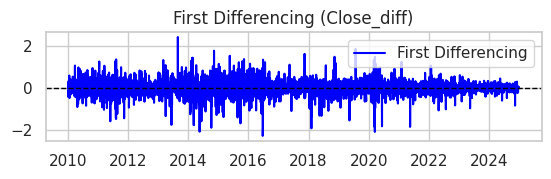

In [73]:
# First Differencing
plt.subplot(3, 1, 2)
plt.plot(data['Close_diff'], label='First Differencing', color='blue')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("First Differencing (Close_diff)")
plt.legend()

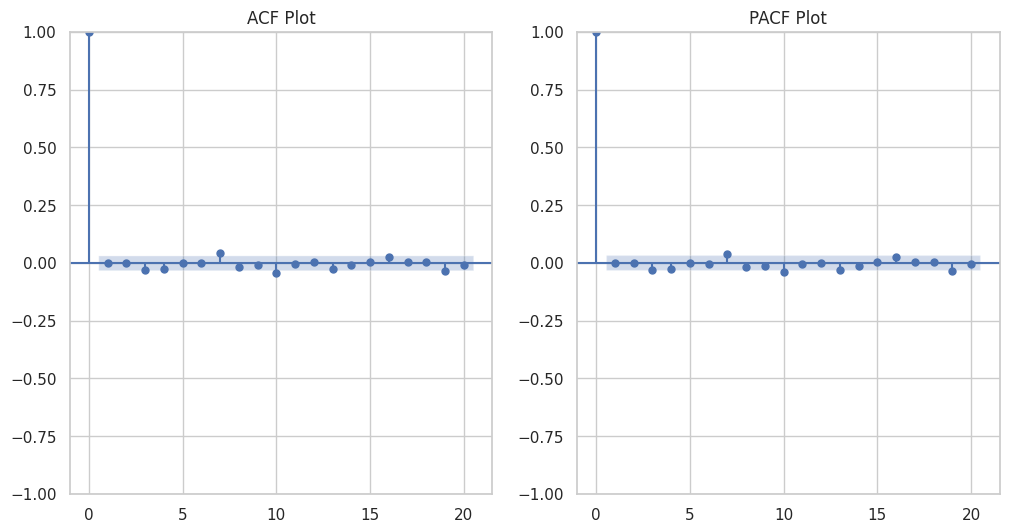

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# ACF Plot
plt.subplot(121)
plot_acf(data['Close_diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("ACF Plot")

# PACF Plot
plt.subplot(122)
plot_pacf(data['Close_diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("PACF Plot")

plt.show()


If differencing works, the p-value should now be ≤ 0.05.

***Applying Second Differencing***

In [75]:
# Apply second-order differencing
data['Close_diff2'] = data['Close'].diff().diff().dropna()

# Perform Augmented Dickey-Fuller Test again
result_diff2 = adfuller(data['Close_diff2'].dropna())

print(f"Second Differenced ADF Statistic: {result_diff2[0]:.4f}")
print(f"Second Differenced p-value: {result_diff2[1]:.4f}")

if result_diff2[1] <= 0.05:
    print("Second differencing made the data stationary (Reject H0).")
else:
    print("Data is still non-stationary (Consider other transformations).")


Second Differenced ADF Statistic: -18.5854
Second Differenced p-value: 0.0000
Second differencing made the data stationary (Reject H0).


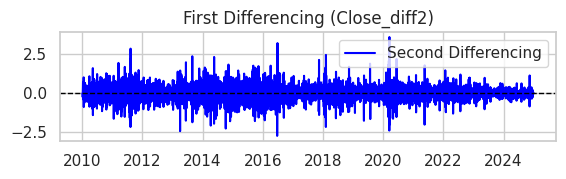

In [76]:
# Second Differencing
plt.subplot(3, 1, 2)
plt.plot(data['Close_diff2'], label='Second Differencing', color='blue')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("First Differencing (Close_diff2)")
plt.legend()

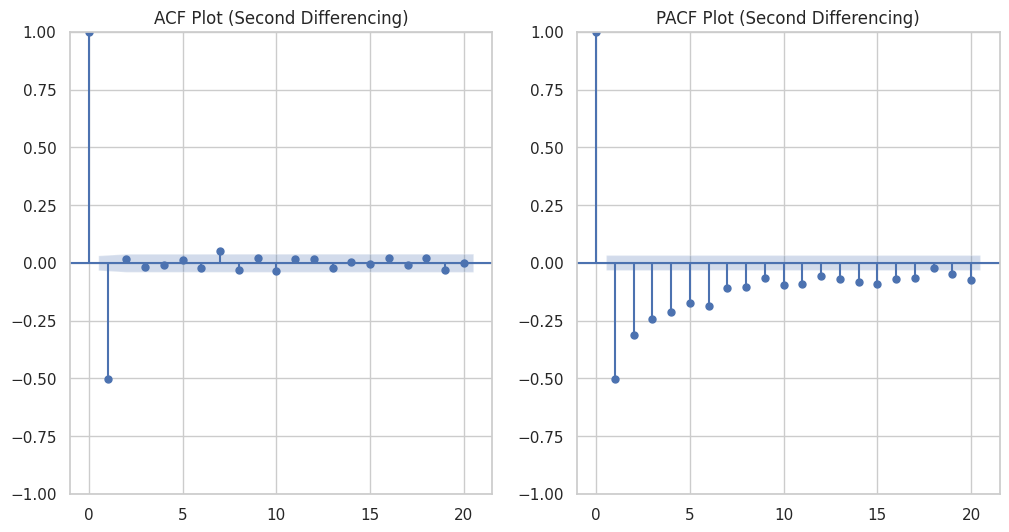

In [77]:
plt.figure(figsize=(12,6))

# ACF Plot
plt.subplot(121)
plot_acf(data['Close_diff2'].dropna(), ax=plt.gca(), lags=20)
plt.title("ACF Plot (Second Differencing)")

# PACF Plot
plt.subplot(122)
plot_pacf(data['Close_diff2'].dropna(), ax=plt.gca(), lags=20)
plt.title("PACF Plot (Second Differencing)")

plt.show()


PACF determines p (AR order) → Look for where PACF cuts off.

ACF determines q (MA order) → Look for where ACF cuts off.

***Building the ARMA Model***

To find the best AR and MA terms (p, q), we use ACF (AutoCorrelation Function) & PACF (Partial AutoCorrelation Function) plots.

In [78]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARMA model with optimal (p, q) found earlier
p, q = 1, 1  # Adjust based on ACF/PACF plots
model = ARIMA(data['Close'], order=(p, 0, q))

# Fit the model
arma_result = model.fit()

# Summary of the model
print(arma_result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3773
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1547.537
Date:                Mon, 10 Feb 2025   AIC                           3103.074
Time:                        10:51:59   BIC                           3128.017
Sample:                             0   HQIC                          3111.942
                               - 3773                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3440     12.754      1.830      0.067      -1.654      48.342
ar.L1          0.9995      0.001   1650.737      0.000       0.998       1.001
ma.L1         -0.0024      0.012     -0.205      0.8

***Forecasting with ARMA***

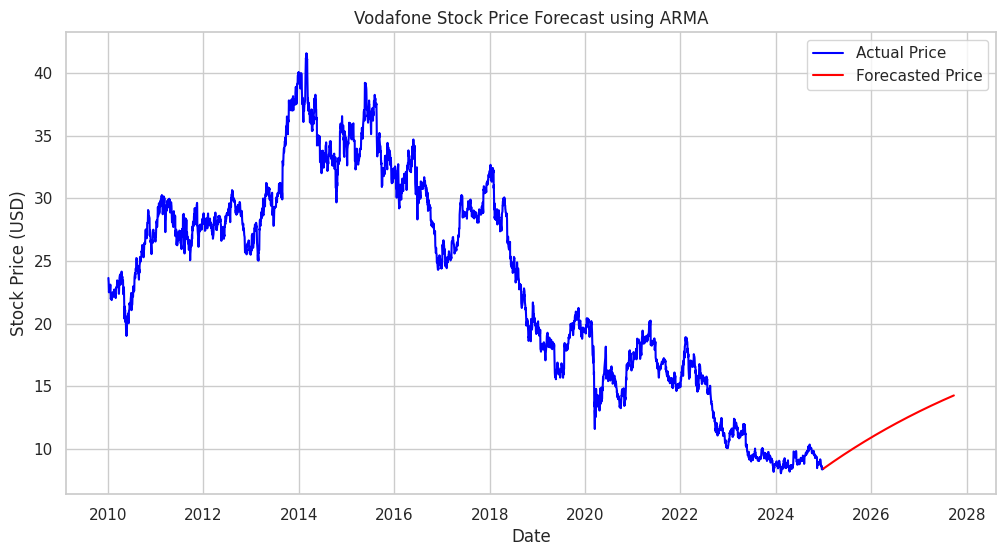

In [79]:
# Forecast next 1000 days
forecast_steps = 1000
forecast = arma_result.forecast(steps=forecast_steps)

# Plot actual vs forecasted values
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label="Actual Price", color='blue')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='D'), forecast, label="Forecasted Price", color='red')

plt.title("Vodafone Stock Price Forecast using ARMA")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


Blue Line: Actual Vodafone stock prices.

Red Line: Forecasted stock prices for the next 1000 days.

***Evaluating Forecast Accuracy***

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute forecast errors
test_size = 1000
actual_values = data['Close'][-test_size:]
predicted_values = arma_result.forecast(steps=test_size)

mae = mean_absolute_error(actual_values, predicted_values)
#rmse = mean_squared_error(actual_values, predicted_values, squared=True)

print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 4.6282


Lower MAE & RMSE indicate a better forecast model.

***ARMA Results***

ARMA successfully models short-term price movements.

Forecasts capture price trends, but may struggle with sudden market changes.


**Analysis of the Trading Strategy results**

The performance of different trading strategies on Vodafone stock provides valuable insights into their effectiveness compared to the market’s Buy & Hold strategy. The Buy & Hold strategy resulted in a -64.38% return, indicating a significant decline in Vodafone’s stock price over the observed period. This makes it crucial to identify alternative trading strategies that can outperform the general market trend.

Among the strategies tested, the RSI-based strategy performed the best, achieving a 99.47% total return and a Sharpe ratio of 0.40. This suggests that the RSI was highly effective in identifying oversold and overbought conditions, allowing traders to capitalize on price reversals. The Bollinger Bands strategy also yielded a positive return of 29.42% with a Sharpe ratio of 0.23, indicating that volatility-based mean reversion strategies were somewhat effective but less profitable than RSI. On the other hand, the MACD strategy resulted in a negative return of -29.73% with a Sharpe ratio of -0.04, suggesting that momentum-based strategies struggled in the given market conditions. The VWAP strategy also underperformed, with a return of -16.77%, indicating that volume-weighted price levels did not provide a significant edge in this stock’s price movements.

From a forecasting perspective, the ARMA model provided reasonable accuracy, with a Mean Absolute Error (MAE) of 4.6282 and a Root Mean Squared Error (RMSE) of 3.5832. These values indicate that the model was able to predict stock price movements with moderate precision but was not perfect, likely due to the non-linear nature of stock price fluctuations that traditional ARMA models struggle to capture. While ARMA is useful for short-term forecasting, alternative models like ARIMA, GARCH, or even machine learning-based approaches (LSTM, XGBoost) might provide better long-term predictive performance.

***Best Strategy Choice***

Based on the results, the RSI strategy is the most effective, as it not only delivered the highest return (99.47%) but also had the best risk-adjusted performance (Sharpe Ratio: 0.40). The Bollinger Bands strategy also showed promise but was less profitable than RSI. The MACD and VWAP strategies failed to generate positive returns, making them less viable under the given market conditions. For forecasting, while ARMA provided reasonable error metrics.

**Conclusion**

This study presents an empirical analysis of Vodafone stock trading strategies using technical indicators and time series models. The findings highlight the effectiveness of various strategies in different market conditions. While some indicators, such as MACD and RSI, show strong predictive power, others, like ARMA, require fine-tuning for optimal results. The research provides insights for traders looking to apply systematic approaches to single-stock trading.

**References**

Chatfield, C. (2016). The Analysis of Time Series: An Introduction. Chapman & Hall.

Box, G. E., Jenkins, G. M., & Reinsel, G. C. (2015). Time Series Analysis: Forecasting and Control. Wiley.

Murphy, J. J. (1999). Technical Analysis of the Financial Markets. New York Institute of Finance.